https://www.kaggle.com/code/naishamishra/mall-customer-segmentation

# Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

# Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

データを使って

1.   Spending Scoreを予測
2.   Spending Scoreが高い傾向を示す傾向を導き出す



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
datas = pd.read_csv('Mall_Customers.csv')
datas.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


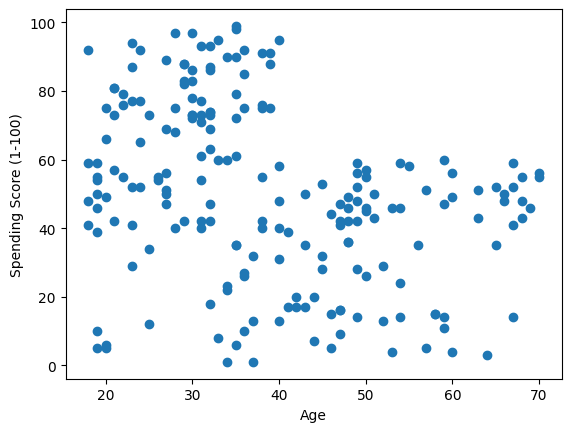

In [ ]:
# 手動でグラフ化
plt.scatter(datas['Age'], datas['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [ ]:
# 前処理前の統計量
datas.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# データ前処理
datas.drop('CustomerID',axis=1,inplace=True)

In [ ]:
datas.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
encoder=LabelEncoder()
datas['Gender']=encoder.fit_transform(datas['Gender'])

gender_mappings={index:label for index, label in enumerate(encoder.classes_)}
gender_mappings

# 正規化
columns = datas.columns
scaler=StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(datas[columns[:3]]),columns=datas.columns[:3])

scaled_data[columns[3]] = datas[columns[3]]
print(scaled_data.head())
scaled_data.describe()

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999                      39
1  1.128152 -1.281035           -1.738999                      81
2 -0.886405 -1.352802           -1.700830                       6
3 -0.886405 -1.137502           -1.700830                      77
4 -0.886405 -0.563369           -1.662660                      40


,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,3.108624e-17,-1.021405e-16,-2.131628e-16,50.200000
std,1.002509e+00,1.002509e+00,1.002509e+00,25.823522
min,-8.864053e-01,-1.496335e+00,-1.738999e+00,1.000000
25%,-8.864053e-01,-7.248436e-01,-7.275093e-01,34.750000
50%,-8.864053e-01,-2.045351e-01,3.587926e-02,50.000000
75%,1.128152e+00,7.284319e-01,6.656748e-01,73.000000
max,1.128152e+00,2.235532e+00,2.917671e+00,99.000000


とりあえず、変数でどこか強い相関がないかを確認してみる
→ほぼ、単独の変数に相関はない

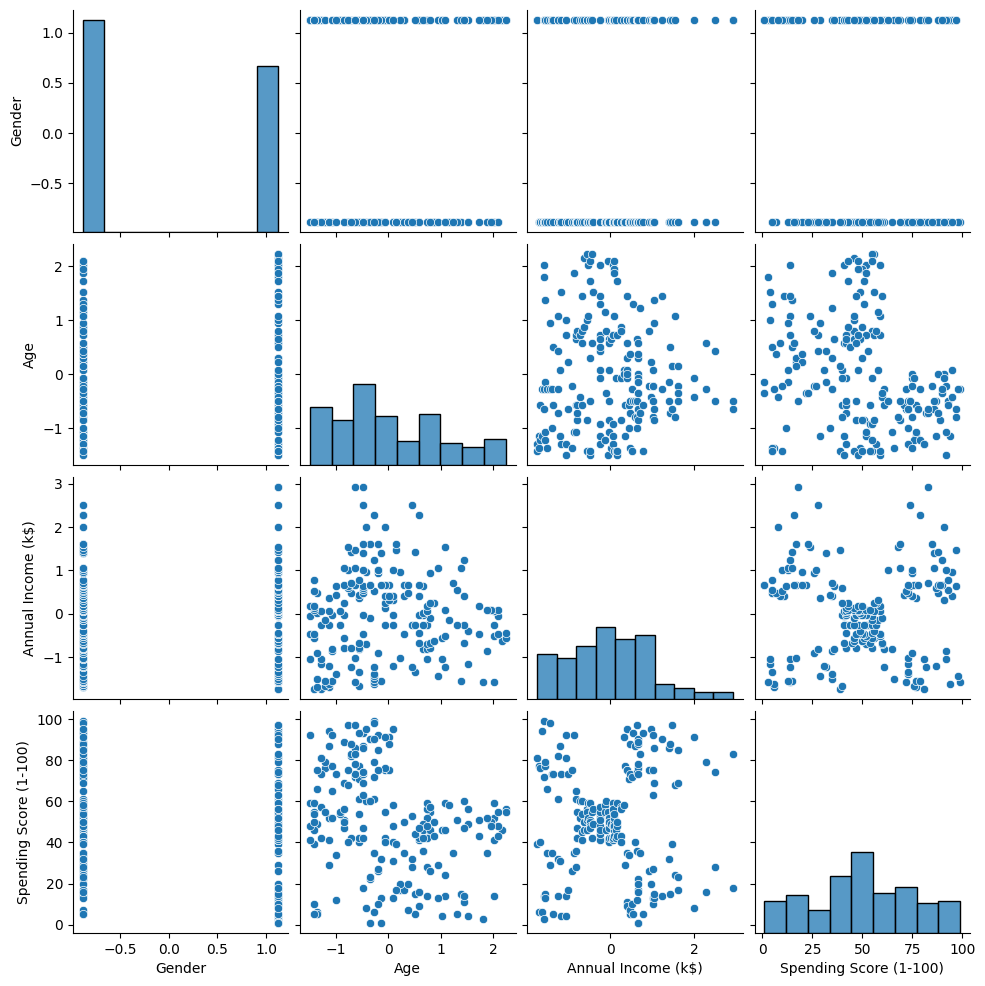

In [ ]:
# 相関確認
import seaborn as sns
sns.pairplot(data=scaled_data)

In [ ]:
!pip install umap-learn[plot]

In [ ]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,39
1,1.128152,-1.281035,-1.738999,81
2,-0.886405,-1.352802,-1.700830,6
3,-0.886405,-1.137502,-1.700830,77
4,-0.886405,-0.563369,-1.662660,40
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,79
196,-0.886405,0.441365,2.497807,28
197,1.128152,-0.491602,2.497807,74
198,1.128152,-0.491602,2.917671,18


In [ ]:
y = scaled_data['Spending Score (1-100)']
X = scaled_data.drop('Spending Score (1-100)', axis=1)

# labels=Falseで階級の値にすることが出来る
y = pd.cut(y, np.arange(0, 101, 10),
           include_lowest=True, right=False,labels=False)

umapで次元圧縮後に、使用金額のスコアの相関を見るとある程度、高いスコアと低いスコアで領域が分かれるような傾向が確認された。

ある程度は推測できる可能性がある

<Axes: >

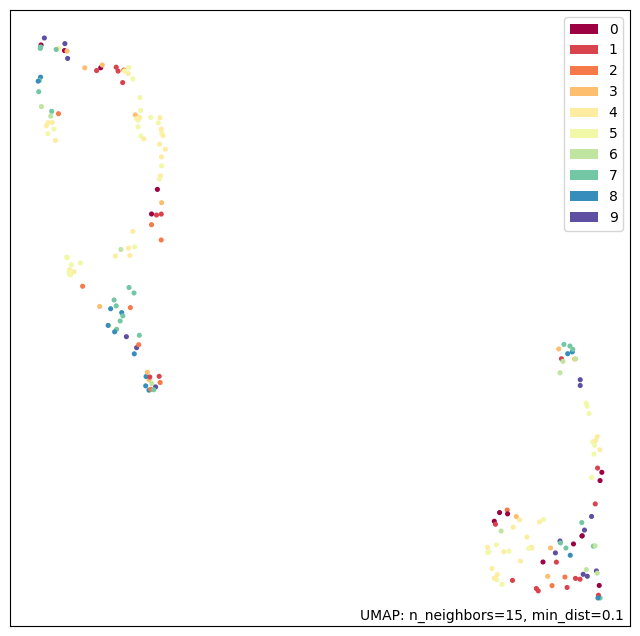

In [ ]:
import umap.plot
mapper = umap.UMAP().fit(X)
umap.plot.points(mapper, labels=y)

In [ ]:
# 次元圧縮はこんな感じ
mapper.embedding_[:10]

array([[ 7.490839 ,  7.979233 ],
       [ 7.5047274,  7.8958364],
       [ 7.620319 ,  7.8840976],
       [ 7.483798 ,  7.947712 ],
       [ 8.570313 ,  7.3606567],
       [ 7.688177 ,  7.8334427],
       [ 8.718874 ,  7.242186 ],
       [ 7.638173 ,  7.9526343],
       [11.912207 ,  6.1299567],
       [ 8.49603  ,  7.4667897]], dtype=float32)

In [ ]:
# pandas→numpy化
X = X.values
y = y.values

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

params = {
    'objective': 'multiclass', # 多クラス分類
    'num_class': 10, # クラスの数
    'metric': 'multi_logloss' # 損失関数にmulti_loglossを使用
}
dtrain = lgb.Dataset(X_train, y_train)
dtest = lgb.Dataset(X_test, y_test)
model = lgb.train(params,dtrain)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 180, number of used features: 3
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.420368
[LightGBM] [Info] Start training from score -2.890372
[LightGBM] [Info] Start training from score -2.628007
[LightGBM] [Info] Start training from score -1.582039
[LightGBM] [Info] Start training from score -1.758970
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -2.101914
[LightGBM] [Info] Start training from score -2.553900
[LightGBM] [Info] Start training from score -2.420368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

結局light gbmでは精度はこの程度(0.4)<br>

因みにデータを正規化しようがしまいが、精度は0.4
→lgmに正規化はあんまり影響ない。知ってたけど。。。

[4 7 0 9 0 4 5 1 1 9 5 1 2 5 1 8 4 1 5 5]
[5 7 0 0 1 5 4 1 1 6 5 1 7 5 2 6 5 2 4 5]
Acc : 0.4


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

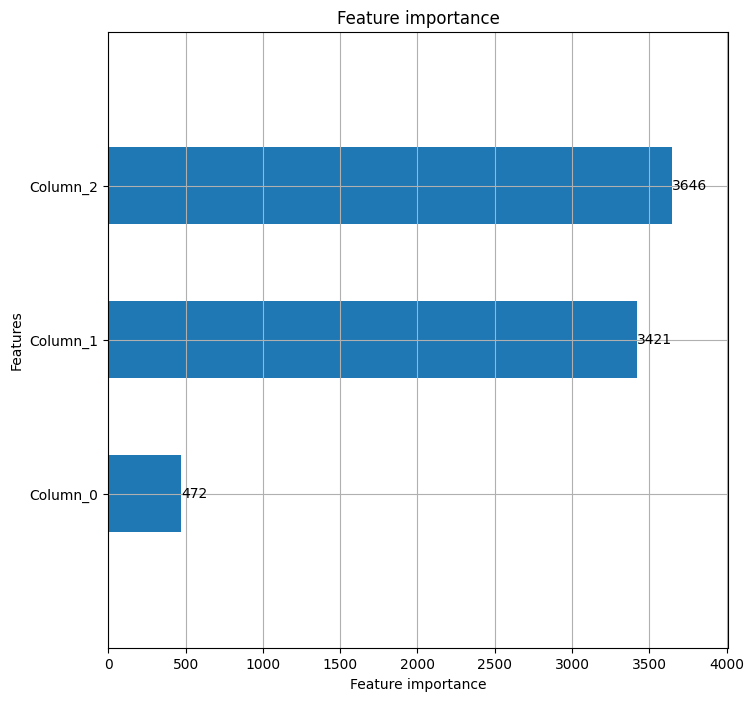

In [ ]:
from sklearn.metrics import accuracy_score
#予測の実行と書き出し
pred_prob = model.predict(X_test)
pred = np.argmax(pred_prob,axis = 1)
print(pred)
print(y_test)
#モデル評価
acc = accuracy_score(y_test,pred)
print('Acc :', acc)

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,8))